In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

```{index} logistic growth
```

```{index} COVID-19
```

# 1. Logistic Growth and COVID-19

## Introduction

In this section, we explain the difference between exponential and logistic growth models using COVID-19 data reported by Wang et. al. in their 2020 paper "Prediction of epidemic trends in COVID-19 with logistic model and machine learning technics."



```{index} exponential growth
```

## Exponential Growth
Let $y(t)$ represent the size of a specified population with $y(0)=y_0$ the initial population size at time $t=0$. The <b>exponential growth model</b> with positive, constant, growth rate $k$

$$
\frac{dy}{dt}=ky, \,\,\,\,y(0)=y_0
$$

is easily solved by separation of variables:

$$
\int \frac{dy}{y}=\,\int k\, dt \Rightarrow\ \ln y = kt + C \Rightarrow y = C_1 e^{kt}.
$$

Using the intial condition $y(0)=y_0$, we obtain

$$
y(t)=y_0e^{kt}.
$$


This model is able to predict rapid growth such as shown in the figure below:

<img src="fig1.png" width="200px">


Indeed, if we specify for example $y(10)=5000$ and $y(20)=30,000$, we have

$$
y(10)=y_0 e^{10k}=5000\Rightarrow y_0= 5000 e^{-10k}
$$

$$
y(20)=y_0 e^{20k}=30,000\Rightarrow  y_0 = 30000 e^{-20k}.
$$

Setting these two expressions for $y_0$ equal to each other gives

$$
5000 e^{-10k}=30000e^{-20k}\Rightarrow e^{10k}=6 \Rightarrow 10k = \ln 6 \Rightarrow  k=\frac{\ln(6)}{10}.
$$


Using this value for $k$, we can now find $y_0$:

$$
y_0 = 5000 e^{-10k}\rightarrow y_0=5000 e^{-10\frac{\ln(6)}{10}}= 5000 e^{-\ln 6} = 5000 ( \frac{1}{6}) = 5000/6.
$$

Let's look at a graph of $y=y_0e^{kt}$ for these values of $k$ and $y_0$.

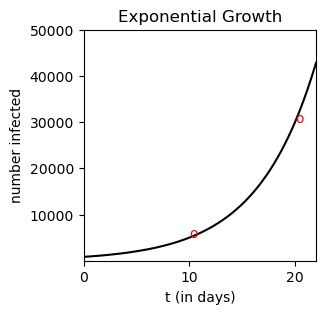

In [2]:
k=np.log(6)/10
y0=5000/6

f = lambda t : y0 * np.exp(k*t)
t=np.arange(0,22,.01)
y=f(t)
plt.figure(figsize=(3,3))
plt.gca().set_xticks([0,10,20.])
plt.gca().set_yticks([10000,20000,30000,40000,50000])
plt.plot(t,y,'k',markersize=10)
plt.text(10,5000,'o',color='r')
plt.text(20,30000,'o',color='r')
plt.title('Exponential Growth')
plt.xlabel('t (in days)')
plt.ylabel('number infected')
plt.ylim((0,50000)) 
plt.xlim((0,22)) 
plt.show()

Any exponential growth function with $y_0>0$ and $k>0$ is such that $\lim_{t\rightarrow\infty} y(t) =\infty$  , and thus is not realistic for predicting the spread of COVID-19 if the time horizon is sufficiently long. Observe in our case what happens if we extend for example the time horizon fro  $t=0$ to $t=50$.

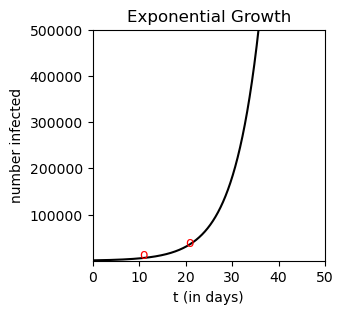

In [3]:
f = lambda t : y0 * np.exp(k*t)
t=np.arange(0,50,.01)
y=f(t)
plt.figure(figsize=(3,3))
plt.gca().set_xticks([0,10,20,30,40,50])
plt.gca().set_yticks([100000,200000,300000,400000,500000])
plt.plot(t,y,'k',markersize=10)
plt.text(10,5000,'o',color='r')
plt.text(20,30000,'o',color='r')
plt.title('Exponential Growth')
plt.xlabel('t (in days)')
plt.ylabel('number infected')
plt.ylim((0,500000)) 
plt.xlim((0,50)) 
plt.show()


The actual reported data is shown below, and shows $y(t)$ leveling off at about 80000.

<img src="fig2.png" width="300px">

```{index} logistic growth model
```

## Logistic Growth Model

The <b>logistic growth model</b>

$$
\frac{dy}{dt}=ky(1-\frac{y}{M}), \,\,\,\,y(0)=y_0
$$

is used to describe "s-shaped" or "sigmoidal" growth. Note that when $y$ is small compared to $M$, then 

$$
\frac{dy}{dt}\approx ky
$$

so we he have exponential growth.

However, as $y$ approaches $M$, the factor $(1-\frac{y}{M})$ approaches 0, and so $\frac{dy}{dt}\rightarrow 0$.This achieves the "leveling off" of the growth.

Let's numerically solve the logistic growth model for the values $k=\log(6)/10$, $y_0=5000/6$ and $M=80000$. 

C:\Users\pisihara\AppData\Local\Temp\ipykernel_22672\137539061.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


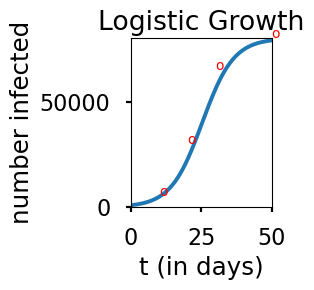

In [4]:

plt.style.use('seaborn-poster')

%matplotlib inline

k=np.log(6)/10
y0=5000/6
M=80000

F = lambda t,y: k*y*(1-y/M)

t_eval = np.arange(0, 50, 0.01)
sol = solve_ivp(F, [0, 50], [y0], t_eval=t_eval)

plt.figure(figsize = (3,3))
plt.plot(sol.t, sol.y[0])
plt.text(10,5000,'o',color='r')
plt.text(20,30000,'o',color='r')
plt.text(30,65000,'o',color='r')
plt.text(50,80000,'o',color='r')


plt.title('Logistic Growth')
plt.xlabel('t (in days)')
plt.ylabel('number infected')
plt.ylim((0,80000)) 
plt.xlim((0,50)) 
plt.tight_layout()
plt.show()

## Exercises

```{admonition} Exercises


1) Use separation of variables and partial fractions to obtain the general solution to the logistic model

$$
\frac{dy}{dt}=ky(1-\frac{y}{M})\,\,\,y(0)=y_0
$$

2) a) Make a plot of the logistic model solutions for the values $k=1$, $M=100$  for $y_0=10$, $y_0=50$, $y_0=90$, and $y_0=110$.

b) Sketch a slope field to explain qualitatively the behavior of the general logistic model for $k>0$ and $M>0$. Sketch  solution curves where a) $y_0$ is close to 0; b) $y_0$ is roughly $M/2$; c) $y_0$ is slightly smaller than $M$;  and d) $y_0$ is slightly greater than $M$  

```

#### Reference

Wang, P., Zheng, X., Li, J., and Zhu, B.  2020. Prediction of epidemic trends in COVID-19 with logistic model and machine learning technics.  Chaos, Solitons, and Fractals, 139(2020), 1-7.